In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [3]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

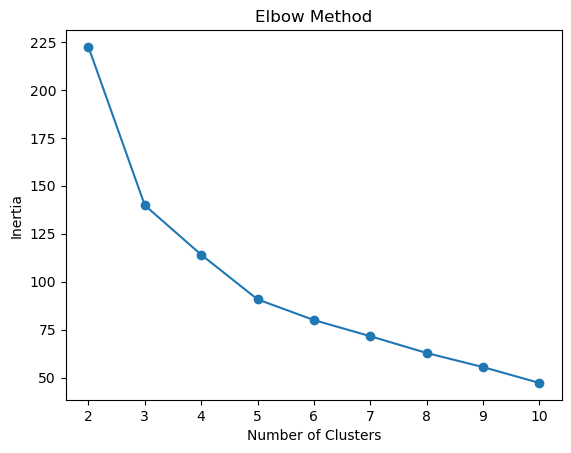

In [4]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [5]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
cluster_assignments = kmeans.fit_predict(normalized_data)
data['Cluster'] = cluster_assignments

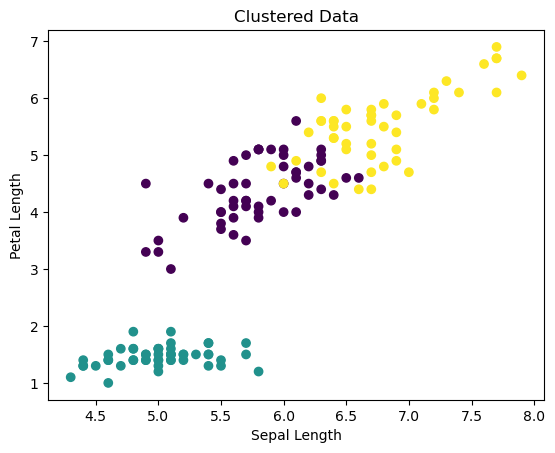

In [6]:
plt.scatter(data['sepal length (cm)'], data['petal length (cm)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Clustered Data')
plt.show()